In [81]:
#Import the necessary packages 
import pandas as pd
import datetime as dt
import calendar
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [82]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [83]:
retail = pd.read_excel("new data.xlsx",sheet_name="US data 2018-19")

In [84]:
retail.head()

,Reference,Date,Month,Party Name,Item Name,Billed Quantity,Rate,Amount,USD RATE,AMOUNT IN INR,Region,STATES
0,Apr18/USA/001,2018-04-30,2018-04-18,A and O,XR,58.0,15.0,870.0,66.47,57828.90,US,PA
1,Apr18/USA/001,2018-04-30,2018-04-18,A and O,XR,39.0,20.0,780.0,66.47,51846.60,US,PA
2,Apr18/USA/002,2018-04-30,2018-04-18,Albert Einstein\r\n,CT,494.0,33.5,16549.0,66.47,1100012.03,US,US
3,Apr18/USA/002,2018-04-30,2018-04-18,Albert Einstein\r\n,MR,3.0,50.0,150.0,66.47,9970.50,US,US
4,Apr18/USA/002,2018-04-30,2018-04-18,Albert Einstein\r\n,US,44.0,33.5,1474.0,66.47,97976.78,US,US


In [85]:
newdata = retail[['Date', 'Party Name', 'Item Name','Billed Quantity','Amount','STATES']].copy()

In [86]:
newdata.isnull().sum()
newdata.dropna(how='any',inplace=True)     

Date                0
Party Name          0
Item Name           0
Billed Quantity    10
Amount              8
STATES              0
dtype: int64

In [87]:
newdata.head()

,Date,Party Name,Item Name,Billed Quantity,Amount,STATES
0,2018-04-30,A and O,XR,58.0,870.0,PA
1,2018-04-30,A and O,XR,39.0,780.0,PA
2,2018-04-30,Albert Einstein\r\n,CT,494.0,16549.0,US
3,2018-04-30,Albert Einstein\r\n,MR,3.0,150.0,US
4,2018-04-30,Albert Einstein\r\n,US,44.0,1474.0,US


In [88]:
test1=newdata

In [89]:
test1['DoP'] = pd.to_datetime(test1['Date'])

In [90]:
test1.head()

,Date,Party Name,Item Name,Billed Quantity,Amount,STATES,DoP
0,2018-04-30,A and O,XR,58.0,870.0,PA,2018-04-30
1,2018-04-30,A and O,XR,39.0,780.0,PA,2018-04-30
2,2018-04-30,Albert Einstein\r\n,CT,494.0,16549.0,US,2018-04-30
3,2018-04-30,Albert Einstein\r\n,MR,3.0,150.0,US,2018-04-30
4,2018-04-30,Albert Einstein\r\n,US,44.0,1474.0,US,2018-04-30


In [91]:
CT = test1.loc[test1['Item Name'] == 'CT']
US = test1.loc[test1['Item Name'] == 'US']

In [92]:
CT['DoP'].min(), CT['DoP'].max()

CT= CT.groupby('DoP')['Amount'].sum().reset_index()
US= US.groupby('DoP')['Amount'].sum().reset_index()

(Timestamp('2018-04-30 00:00:00'), Timestamp('2019-03-31 00:00:00'))

In [93]:
CT.head(21)
US.head(21)

,DoP,Amount
0,2018-04-30,720108.13
1,2018-05-31,771750.83
2,2018-06-30,778530.44
3,2018-07-31,888788.06
4,2018-08-31,845214.06
5,2018-09-30,812679.69
6,2018-10-31,886955.25
7,2018-11-30,808863.77
8,2018-12-31,871853.17
9,2019-01-31,936919.55


,DoP,Amount
0,2018-04-30,87708.75
1,2018-05-31,90248.00
2,2018-06-30,86213.88
3,2018-07-31,95571.50
4,2018-08-31,97054.38
5,2018-09-30,87834.50
6,2018-10-31,90708.59
7,2018-11-30,87599.77
8,2018-12-31,95072.43
9,2019-01-31,113834.63


In [94]:
CT = CT.set_index('DoP')
US = US.set_index('DoP')
y_CT = CT['Amount'].resample('MS').mean()
y_US = US['Amount'].resample('MS').mean()
#y_US = US.set_index('DoP')

In [95]:
y_CT['2018':]
y_US['2018':]

DoP
2018-04-01     720108.13
2018-05-01     771750.83
2018-06-01     778530.44
2018-07-01     888788.06
2018-08-01     845214.06
2018-09-01     812679.69
2018-10-01     886955.25
2018-11-01     808863.77
2018-12-01     871853.17
2019-01-01     936919.55
2019-02-01     876367.26
2019-03-01    1028941.48
Freq: MS, Name: Amount, dtype: float64

DoP
2018-04-01     87708.75
2018-05-01     90248.00
2018-06-01     86213.88
2018-07-01     95571.50
2018-08-01     97054.38
2018-09-01     87834.50
2018-10-01     90708.59
2018-11-01     87599.77
2018-12-01     95072.43
2019-01-01    113834.63
2019-02-01     97744.73
2019-03-01    111762.50
Freq: MS, Name: Amount, dtype: float64

TypeError: float() argument must be a string or a number, not 'Period'

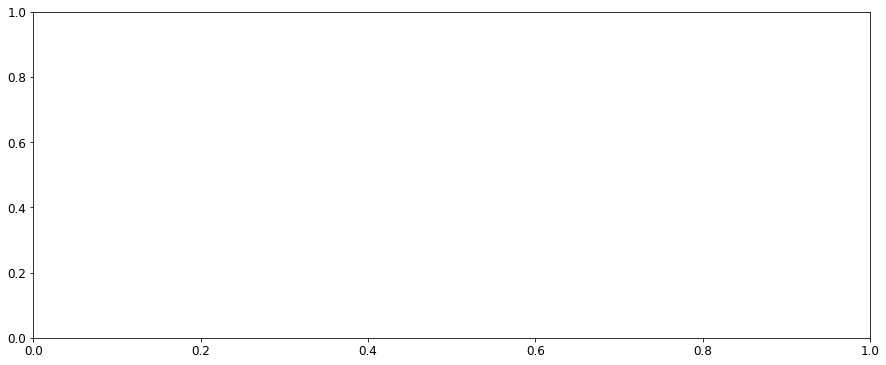

In [100]:
y_CT.plot(figsize=(15, 6))
plt.show()

y_US.plot(figsize=(15, 6))
plt.show()

In [102]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [103]:
mod = sm.tsa.statespace.SARIMAX(y_CT,
                                order=(1, 1, 1),
                                #seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6287      0.452     -1.391      0.164      -1.515       0.257
ma.L1         -0.0204      0.584     -0.035      0.972      -1.164       1.124
sigma2       4.22e+09   8.64e-11   4.88e+19      0.000    4.22e+09    4.22e+09


In [104]:
item_aggr = test1.groupby(['DoP', 'Item Name']).agg({'Billed Quantity': lambda x: x.sum(), # Total volume
                                        'Amount': lambda x: x.sum()}) # Monetary Value

In [105]:
party_aggr= test1.groupby(['DoP', 'Party Name']).agg({'Billed Quantity': lambda x: x.sum(), # Total volume
                                        'Amount': lambda x: x.sum()}) # Monetary Value

In [106]:
party_aggr.head(20)

Billed Quantity  \
DoP        Party Name                                                    
2018-04-30 A and O                                                97.0   
           AMM                                                   293.0   
           Albert Einstein\r\n                                   541.0   
           Backus-Norwich\r\n                                    684.0   
           Boone & Fitzgibbon\r\n                                316.0   
           Bothwell                                              237.0   
           Bradley\r\n                                            79.0   
           Breckenridge                                          233.0   
           Bristol\r\n                                           273.0   
           Carney (Steward Health Group)                         392.0   
           Caverna\r\n                                           108.0   
           Chicago-Trinty & Loretto                              390.0   
           Clara Maass Medical Center                            700.0   
           DRA-Waterbury\r\n                                     454.0   
           Danbury\r\n                                           864.0   
           Einstein Montgomery  (Albert Einstein)\r\n            494.0   
           FHP\r\n                                                 5.0   
           GREENWICH\r\n                                         351.0   
           Georgia West Imaging-Tanner\r\n                       642.0   
           Good Sam (Steward Health Group)                       739.0   

                                                         Amount  
DoP        Party Name                                            
2018-04-30 A and O                                      1650.00  
           AMM                                         16115.00  
           Albert Einstein\r\n                         18173.00  
           Backus-Norwich\r\n                          21204.00  
           Boone & Fitzgibbon\r\n                       9754.50  
           Bothwell                                     7568.00  
           Bradley\r\n                                  2898.50  
           Breckenridge                                 4882.00  
           Bristol\r\n                                  8463.00  
           Carney (Steward Health Group)               10759.00  
           Caverna\r\n                                  3451.00  
           Chicago-Trinty & Loretto                    14097.00  
           Clara Maass Medical Center                  23514.00  
           DRA-Waterbury\r\n                           13830.25  
           Danbury\r\n                                 27100.38  
           Einstein Montgomery  (Albert Einstein)\r\n  16549.00  
           FHP\r\n                                       387.00  
           GREENWICH\r\n                               13992.00  
           Georgia West Imaging-Tanner\r\n             25920.00  
           Good Sam (Steward Health Group)             20099.00

In [107]:
item_aggr.head(20)

Billed Quantity     Amount
DoP        Item Name                            
2018-04-30 CT                 21520.0  720108.13
           MG                    50.0    1850.00
           MIN                    8.0     247.00
           MR                  1148.0   45647.00
           NM                    96.0    2961.50
           US                  3697.0   87708.75
           XR                  8413.0   33000.25
2018-05-01 NM                     2.0      80.00
2018-05-31 CT                 23303.0  771750.83
           MG                    20.0     710.00
           MIN                   11.0     343.50
           MR                  1287.0   47878.50
           NM                   105.0    3383.50
           OTHERS                13.0    1235.00
           US                  3902.0   90248.00
           XR                  8168.0   27009.00
2018-06-30 CT                 23366.0  778530.44
           MG                    26.0     962.00
           MIN                   16.0     501.50
           MR                  1332.0   53231.50

In [108]:
#Top revenue generating products
Products_by_Revenue = test1.groupby(by='Item Name')['Amount'].sum().sort_values(ascending=False)
Products_by_Revenue.head(10)

Item Name
CT        10226971.69
US         1141353.66
MR          696274.10
XR          370585.25
NM           39788.44
XR           35091.88
OTHERS       15505.46
NM           10749.34
MG            4331.00
MIN           3996.00
Name: Amount, dtype: float64

In [109]:
#Bottom 10 products with respect to revenue
Products_by_Revenue.tail(10)

Item Name
MR          696274.10
XR          370585.25
NM           39788.44
XR           35091.88
OTHERS       15505.46
NM           10749.34
MG            4331.00
MIN           3996.00
Minimum        445.00
3D CASES       252.00
Name: Amount, dtype: float64

In [110]:
#Top revenue generating customers
Customers_by_Revenue = test1.groupby(by='Party Name')['Amount'].sum().sort_values(ascending=False)
Customers_by_Revenue.head(10)

Party Name
Inspira\r\n                             805676.04
JHAH                                    759092.00
Lourdes\r\n                             705384.00
SouthCoast                              547972.60
St. Joseph Regional Medical Center      454156.00
Self Regional                           420640.38
Danbury\r\n                             382053.54
L & M Hospital (Ocean Radiology)\r\n    369781.00
Susquehanna Imaging Associates\r\n      359768.75
Mercy Medical Center                    349029.00
Name: Amount, dtype: float64

In [111]:
#Bottom 10 customers
Customers_by_Revenue.tail(10)

Party Name
Cardio                                               15016.5
Pershing\r\n                                         13110.5
PMX (Alpha-MXI)\r\n                                  10060.0
Sono                                                  7536.0
Advanced MRI                                          4984.0
Cross-Sectional Imaging Consultants Inc. (Malaro)     4788.0
Landmark Cancer Center                                2720.0
Galkayo                                                995.0
Prima\r\n                                              605.0
Bayelsa                                                 29.0
Name: Amount, dtype: float64

In [112]:
#Track the total sales month on month
Month_Wise_Monetary = test1.groupby(['DoP']).agg({'Amount': lambda x: x.sum()}) # Monetary Value

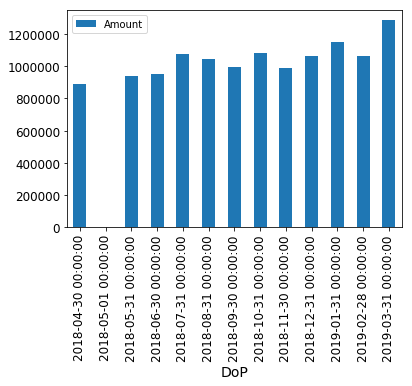

In [113]:
%matplotlib inline
Month_Wise_Monetary.plot(kind="bar")

In [114]:
cols = ['Date', 'Party Name', 'Item Name', 'Amount', 'Billed Quantity', 'STATES']

In [115]:
CT = CT.sort_values('DoP')
US = US.sort_values('DoP')

In [116]:
CT = CT.groupby('DoP')['Amount'].sum().reset_index()

In [117]:
US = US.groupby('DoP')['Amount'].sum().reset_index()

In [118]:
CT = CT.set_index('DoP')

In [119]:
US = US.set_index('DoP')


In [120]:
y_CT = CT['Amount'].resample('MS').mean()

In [121]:
y_US = US['Amount'].resample('MS').mean()

In [122]:
CT = pd.DataFrame({'DoP':y_CT.index, 'Amount':y_CT.values})

In [123]:
US = pd.DataFrame({'DoP': y_US.index, 'Amount': y_US.values})

In [124]:
sales = CT.merge(US, how='inner', on='DoP')

In [125]:
sales.rename(columns={'Amount_x': 'CT_sales', 'Amount_y': 'US_sales'}, inplace=True)

In [126]:
sales.head()

,DoP,CT_sales,US_sales
0,2018-04-01,720108.13,87708.75
1,2018-05-01,771750.83,90248.00
2,2018-06-01,778530.44,86213.88
3,2018-07-01,888788.06,95571.50
4,2018-08-01,845214.06,97054.38


In [127]:
plt.figure(figsize=(15, 8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

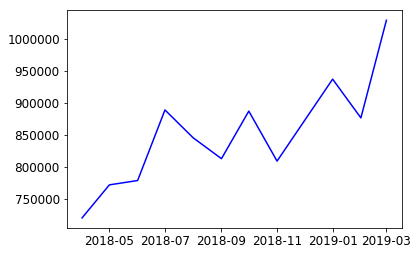

In [128]:
plt.plot(sales['DoP'], sales['CT_sales'], 'b-', label = 'CT')

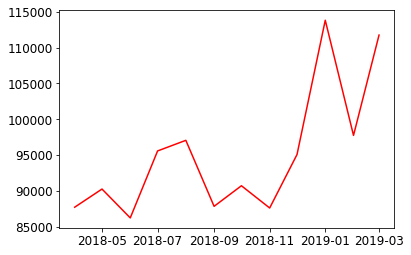

In [129]:
plt.plot(sales['DoP'], sales['US_sales'], 'r-', label = 'US')

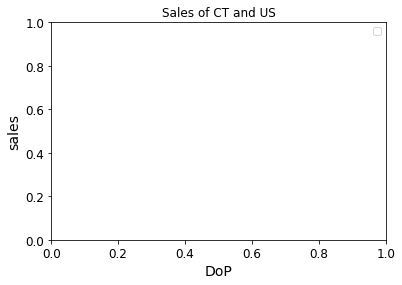

In [130]:
plt.xlabel('DoP'); plt.ylabel('sales'); plt.title('Sales of CT and US')
plt.legend();

In [131]:
first_date = sales.ix[np.min(list(np.where(sales['CT_sales'] > sales['US_sales'])[0])), 'DoP']
print("CT first time produced higher sales than US is {}.".format(first_date.date()))


CT first time produced higher sales than US is 2018-04-01.


/Users/andreabc/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [132]:
#time series with prophet

In [133]:
from fbprophet import Prophet


In [134]:
CT = CT.rename(columns={'DoP': 'ds', 'Amount': 'y'})

In [135]:
CT_model = Prophet(interval_width=0.95)
CT_model.fit(CT)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.


In [136]:
US = US.rename(columns={'DoP': 'ds', 'Amount': 'y'})

In [137]:
US_model = Prophet(interval_width=0.95)
US_model.fit(US)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.


In [138]:
CT_forecast = CT_model.make_future_dataframe(periods=36, freq='MS')
CT_forecast = CT_model.predict(CT_forecast)


In [139]:
US_forecast = US_model.make_future_dataframe(periods=36, freq='MS')
US_forecast = US_model.predict(US_forecast)


<Figure size 1296x432 with 0 Axes>

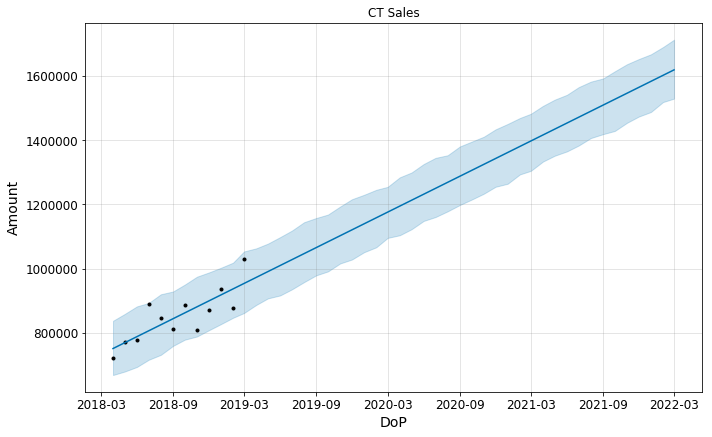

In [140]:
plt.figure(figsize=(18, 6))
CT_model.plot(CT_forecast, xlabel = 'DoP', ylabel = 'Amount')
plt.title('CT Sales');

<Figure size 1296x432 with 0 Axes>

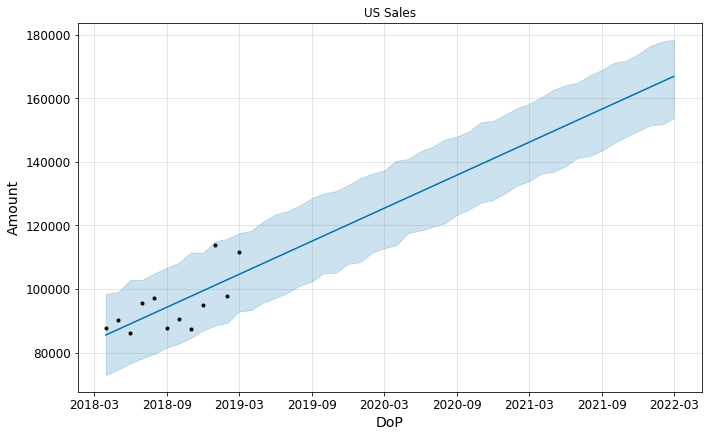

In [141]:
plt.figure(figsize=(18, 6))
US_model.plot(US_forecast, xlabel = 'DoP', ylabel = 'Amount')
plt.title('US Sales');

In [142]:
CT_names = ['CT_%s' % column for column in CT_forecast.columns]

In [143]:
US_names = ['US_%s' % column for column in US_forecast.columns]

In [144]:
merge_CT_forecast = CT_forecast.copy()
merge_US_forecast = US_forecast.copy()


In [60]:
merge_CT_forecast.columns = CT_names
merge_US_forecast.columns = US_names

In [61]:
forecast = pd.merge(merge_CT_forecast, merge_US_forecast, how = 'inner', left_on = 'CT_ds', right_on = 'US_ds')

In [62]:
forecast = forecast.rename(columns={'CT_ds': 'Date'}).drop('US_ds', axis=1)
forecast.head()

,Date,CT_trend,CT_yhat_lower,CT_yhat_upper,CT_trend_lower,CT_trend_upper,CT_additive_terms,CT_additive_terms_lower,CT_additive_terms_upper,CT_multiplicative_terms,...,US_yhat_upper,US_trend_lower,US_trend_upper,US_additive_terms,US_additive_terms_lower,US_additive_terms_upper,US_multiplicative_terms,US_multiplicative_terms_lower,US_multiplicative_terms_upper,US_yhat
0,2018-04-01,750477.501583,658589.329747,837841.107449,750477.501583,750477.501583,0.0,0.0,0.0,0.0,...,98623.623952,85577.060008,85577.060008,0.0,0.0,0.0,0.0,0.0,0.0,85577.060008
1,2018-05-01,768704.435407,673893.571441,853065.207900,768704.435407,768704.435407,0.0,0.0,0.0,0.0,...,99817.273744,87282.279749,87282.279749,0.0,0.0,0.0,0.0,0.0,0.0,87282.279749
2,2018-06-01,787538.932936,695733.275103,870943.161022,787538.932936,787538.932936,0.0,0.0,0.0,0.0,...,102075.063265,89044.340147,89044.340147,0.0,0.0,0.0,0.0,0.0,0.0,89044.340147
3,2018-07-01,805765.866683,708161.411618,896696.536036,805765.866683,805765.866683,0.0,0.0,0.0,0.0,...,102903.281254,90749.559890,90749.559890,0.0,0.0,0.0,0.0,0.0,0.0,90749.559890
4,2018-08-01,824600.364580,737523.654308,917674.783714,824600.364580,824600.364580,0.0,0.0,0.0,0.0,...,104952.333599,92511.620300,92511.620300,0.0,0.0,0.0,0.0,0.0,0.0,92511.620300


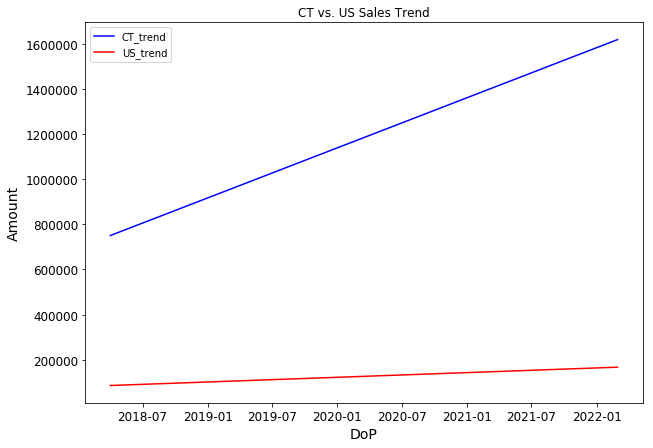

In [63]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['CT_trend'], 'b-')
plt.plot(forecast['Date'], forecast['US_trend'], 'r-')
plt.legend(); plt.xlabel('DoP'); plt.ylabel('Amount')
plt.title('CT vs. US Sales Trend');

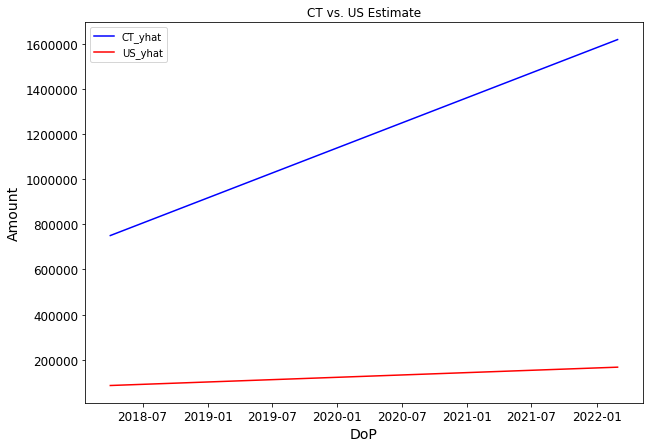

In [108]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['CT_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['US_yhat'], 'r-')
plt.legend(); plt.xlabel('DoP'); plt.ylabel('Amount')
plt.title('CT vs. US Estimate');

In [109]:
#Trends and Patterns

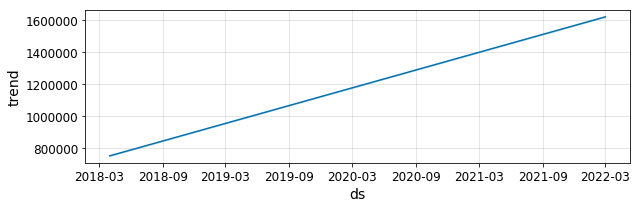

In [110]:
CT_model.plot_components(CT_forecast);

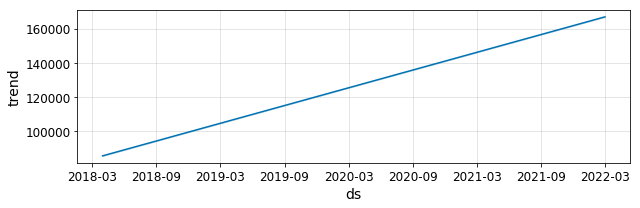

In [111]:
US_model.plot_components(US_forecast);